In [1]:
from jax_elo.models.correlated_skills_model import fit, calculate_ratings, predict, get_player_skill_history

# TODO: Get data from the repo instead
from tdata.functional.sackmann import get_data

/Users/ingramm/miniconda3/envs/tf/lib/python3.7/site-packages/jax/lib/xla_bridge.py:116: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


In [2]:
data = get_data('/Users/ingramm/Projects/tennis/tennis-data/data/sackmann/tennis_atp/')

In [3]:
to_use = data[data['tourney_date'].dt.year >= 2010]
to_use = to_use.dropna(subset=['spw_winner', 'spw_loser'])

In [4]:
margins = to_use['spw_winner'] - to_use['spw_loser']

In [5]:
params, opt_info = fit(to_use['winner_name'], to_use['loser_name'], to_use['surface'].values, 
                       margins=margins.values, verbose=True)

{'a1': 0.010000000000000002, 'a2': array(0.), 'sigma_obs': 0.1}
[[10000.000001     0.           0.      ]
 [    0.       10000.000001     0.      ]
 [    0.           0.       10000.000001]]
{'a1': Traced<ShapedArray(float64[])>with<JVPTrace(level=1/1)>
  with primal = Traced<ShapedArray(float64[]):JaxprTrace(level=-1/1)>
       tangent = Traced<ShapedArray(float64[]):JaxprTrace(level=0/1)>, 'a2': Traced<ShapedArray(float64[])>with<JVPTrace(level=1/1)>
  with primal = Traced<ShapedArray(float64[]):JaxprTrace(level=-1/1)>
       tangent = Traced<ShapedArray(float64[]):JaxprTrace(level=0/1)>, 'sigma_obs': Traced<ShapedArray(float64[])>with<JVPTrace(level=1/1)>
  with primal = Traced<ShapedArray(float64[]):JaxprTrace(level=-1/1)>
       tangent = Traced<ShapedArray(float64[]):JaxprTrace(level=0/1)>}
Traced<ShapedArray(float64[3,3])>with<JVPTrace(level=1/1)>
  with primal = Traced<ShapedArray(float64[3,3]):JaxprTrace(level=-1/1)>
       tangent = Traced<ShapedArray(float64[3,3]):JaxprTrace

{'a1': 0.00014033072507974598, 'a2': array(0.09958352), 'sigma_obs': 0.08337276145326164}
[[ 8615.94221147  4250.54541002  5372.78192733]
 [ 4250.54541002 10792.25889759  7045.63274325]
 [ 5372.78192733  7045.63274325  6890.03695133]]
{'a1': 0.00014026552909881737, 'a2': array(0.09960555), 'sigma_obs': 0.0833821125186074}
[[ 8623.74729547  4253.32715963  5373.00526566]
 [ 4253.32715963 10779.27592     7049.64421628]
 [ 5373.00526566  7049.64421628  6891.86418617]]
{'a1': 0.0001402437568732242, 'a2': array(0.09961194), 'sigma_obs': 0.08338481515853585}
[[ 8626.92281368  4253.84687625  5375.0336087 ]
 [ 4253.84687625 10775.82052084  7049.87284423]
 [ 5375.0336087   7049.87284423  6891.55547721]]
{'a1': 0.00014023910711766067, 'a2': array(0.09961298), 'sigma_obs': 0.08338524194527162}
[[ 8627.64158664  4253.5581219   5375.6919927 ]
 [ 4253.5581219  10775.29115057  7049.85147169]
 [ 5375.6919927   7049.85147169  6891.3135702 ]]
{'a1': 0.0001402349656241624, 'a2': array(0.09961377), 'sigma_

In [6]:
params

EloParams(theta={'a1': 0.0001402465027687641, 'a2': array(0.09961149), 'sigma_obs': 0.08338470228795589}, cov_mat=DeviceArray([[ 8627.30531313,  4243.7595162 ,  5373.37062124],
             [ 4243.7595162 , 10776.60123434,  7050.64881994],
             [ 5373.37062124,  7050.64881994,  6889.66094134]],            dtype=float64))

In [7]:
params.theta['a1']

0.0001402465027687641

In [8]:
history, final_rating_dict, mark_names = calculate_ratings(params, to_use['winner_name'], to_use['loser_name'],
                                            to_use['surface'].values, margins.values)

 54%|█████▍    | 14064/26149 [00:15<00:12, 937.97it/s]


100%|██████████| 26149/26149 [00:28<00:00, 912.10it/s]


In [9]:
history[-1]

{'winner': 'Thiago Seyboth Wild',
 'loser': 'Casper Ruud',
 'winner_prior_mean': {'Clay': 1583.8764297219473,
  'Grass': 1541.2586994314133,
  'Hard': 1552.2410100169593},
 'loser_prior_mean': {'Clay': 1840.3531600014576,
  'Grass': 1633.634548934638,
  'Hard': 1683.1388007203175},
 'winner_prior_prob': 0.20846658704332305,
 'cur_mark': 'Clay'}

In [10]:
predict(final_rating_dict, params, 'Roger Federer', 'Tennys Sandgren', 'Hard', mark_names)

0.9338042575283271

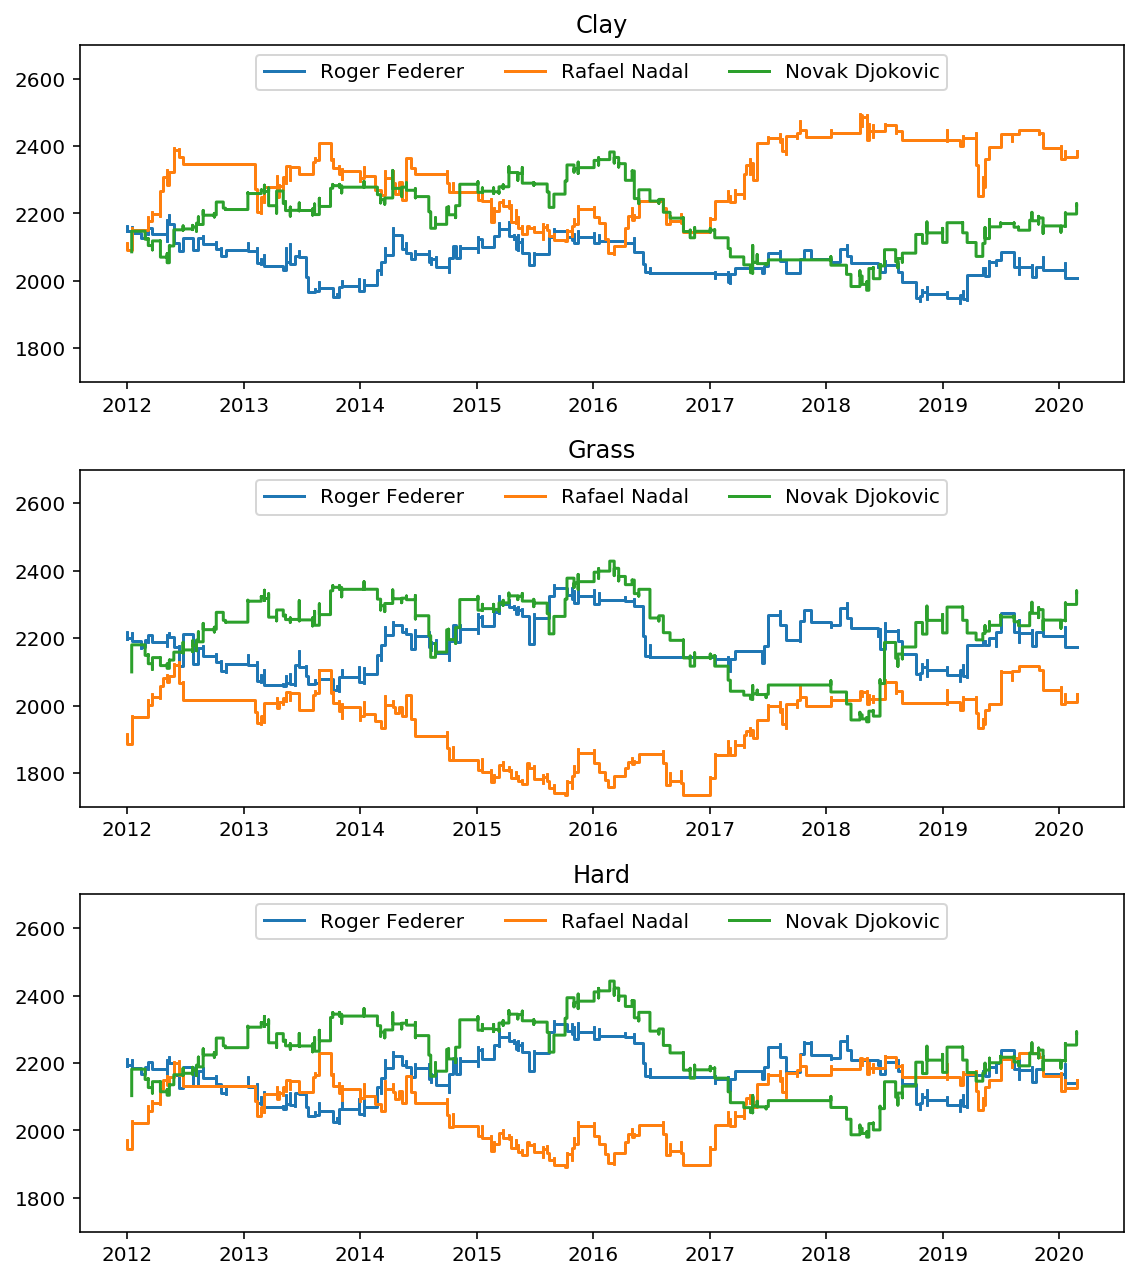

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

f, ax = plt.subplots(len(mark_names), 1)

start_year = 2012
surface = 'Clay'

for cur_player in ['Roger Federer', 'Rafael Nadal', 'Novak Djokovic']:

    cur_history = get_player_skill_history(history, final_rating_dict, to_use['tourney_date'].values, cur_player)
    cur_history = cur_history[cur_history.index >= f'{start_year}-01-01']
    
    for cur_surface, cur_ax in zip(mark_names, ax.reshape(-1)):
        cur_ax.step(cur_history.index, cur_history[cur_surface].values, label=cur_player)
        cur_ax.legend(ncol=3, loc='upper center')
        cur_ax.set_title(cur_surface)
        cur_ax.set_ylim(1700, 2700)

f.set_size_inches(8, 9)
f.tight_layout()

In [12]:
import numpy as np
import pandas as pd

prior_sd = pd.Series(np.sqrt(np.diag(params.cov_mat)), mark_names)
print(prior_sd)

Clay      92.883289
Grass    103.810410
Hard      83.003981
dtype: float64
